# Project: Investigate Medical Appointments No Shows dataset.

## Table of Contents.
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This is a part of Udacity data analysis nanodegree program offered by Egypt FWD(ITIDA). The dataset contains information about more than 110k medical appointments, with the attribute of whether the pathient shows up for the appointment or not. The main objective of this data analysis is to find trends between patients, who didn't show up for their appointemnts. 
<ul>
<li>Does age, gender affect whether the patient show up or not? 
<li>is there a day of the week patients will be more likely to show up at? 
<li>does having a medical condition(eg: Hipertension) increase the chances of showing up? 
</ul>
In the next sections, we will go through the dataset, and clean it to get ready for analysis, and answer the questions already presented above.  

In [4]:
#importing libraries for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#loading data into a dataframe.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


first things first, renameing the columns with lowercase version for easier handling.

In [5]:
#converting columns' names to lowercase for consistency.
df.columns = df.columns.str.lower()

searching for duplicate values and nan values in the dataset.

In [6]:
#checking for NAN values and duplicates,
#and dealing with them if there's any.
print('number of nan values is {}'.format(df.isna().sum().sum()))
print('number of duplicates is {}'.format(df.duplicated().sum()))

number of nan values is 0
number of duplicates is 0


dropping unnecessary columns.

In [7]:
#the column won't be of any use in 
#the analysis process.
df.drop('appointmentid',axis=1,inplace=True)

In [8]:
df[df['age']<0]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


dropping data that doesn't make sense.

In [9]:
#the row is possibly wrong data, so it's removed.
df = df[df.age >= 0]

### Creating new columns for better analysis.

creating new column of days using the appointmentday column for analysis purpose.

In [10]:
#convering appointmentday to daytime.
df.appointmentday = pd.to_datetime(df.appointmentday)

In [11]:
#extracting days from appointmentday.
days = np.array(df.appointmentday.dt.weekday)

In [14]:
#inserting the days column into the dataframe.
df.insert(4,'days',days)
df.days.value_counts()

2    25867
1    25640
0    22714
4    19019
3    17247
5       39
Name: days, dtype: int64

In [15]:
#replacing days with weekdays names.
df.days.replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)
df.days.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: days, dtype: int64

creating new column to categorize patients based on age for easier analysis.

In [ ]:
#categorizing age into multiple categories
#for better and easier analysis.
bins = [0,2,14,24,64,115]
labels = ['infant','child','youth','adult','senior']
df.insert(6,'age_categories',pd.cut(df.age,bins,labels=labels))

In [17]:
#replacing last column with more intuitive values.  
df = df.rename(columns={'no-show':'show'})
df['show'].replace({'No':1,'Yes':0}, inplace=True)

In [18]:
df.head()

,patientid,gender,scheduledday,appointmentday,days,age,age_categories,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,Friday,62,adult,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,Friday,56,adult,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,Friday,62,adult,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,Friday,8,child,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,Friday,56,adult,JARDIM DA PENHA,0,1,1,0,0,0,1


In [19]:
#saving the cleaned version into a new file.
df.to_csv('no_show_cleaned.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [5]:
#loading cleaned version into a dataframe.
df = pd.read_csv('no_show_cleaned.csv')

### Does age, gender affect whether the patient show up or not?

In [21]:
#basic information about patients' age in the dataset.
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<AxesSubplot:>

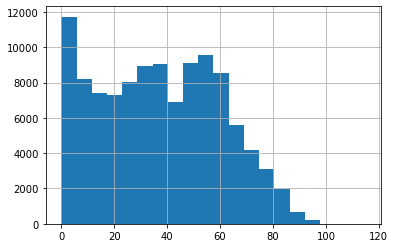

In [5]:
df.age.hist(bins=20)

The age distribution of the dataset is right skewed making the patients of age 5 or less have the majority of the dataset with almost 12000 patients.

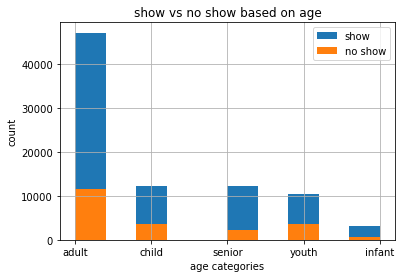

In [11]:
#plotting show vs no show based on age.
show = df.show == 1
no_show = df.show == 0
df.age_categories[show].hist(label='show')
df.age_categories[no_show].hist(label='no show')
plt.xlabel('age categories');
plt.ylabel('count');
plt.title('show vs no show based on age');
plt.legend();

In [23]:
#percentage of no show in the dataset based on age.
(df.age_categories[no_show].value_counts()/df.age_categories.value_counts()).round(2)

adult     0.20
child     0.23
infant    0.17
senior    0.16
youth     0.25
Name: age_categories, dtype: float64

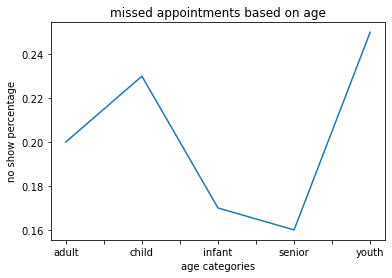

In [25]:
(df.age_categories[no_show].value_counts()/df.age_categories.value_counts()).round(2).plot();
plt.xlabel('age categories');
plt.ylabel('no show percentage');
plt.title('missed appointments based on age');

based on this dataset and relativly speaking, infants and seniors are less likely to miss their appointments, unlike other age categories, where youth are on top of the list for missing their appointments, and children and adults coming second and third respectivly.

In [26]:
#basic information about patients' gender in the dataset.
df.gender.describe()

count     110526
unique         2
top            F
freq       71839
Name: gender, dtype: object

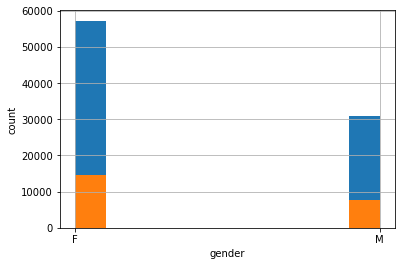

In [27]:
#plotting show vs no show based on gender.
df.gender[show].hist(label='show')
df.gender[no_show].hist(label='no show')
plt.xlabel('gender');
plt.ylabel('count');

In [28]:
#percentage of no show in the dataset based on gender.
(df.gender[no_show].value_counts()/df.gender.value_counts()).round(2)

F    0.2
M    0.2
Name: gender, dtype: float64

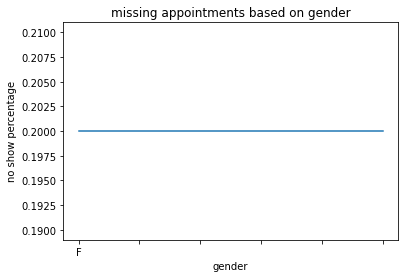

In [29]:
(df.gender[no_show].value_counts()/df.gender.value_counts()).round(2).plot();
plt.xlabel('gender');
plt.ylabel('no show percentage');
plt.title('missing appointments based on gender');

based on above calculations and plotting, gender doesn't seem to affect showing up for the appointment or not.

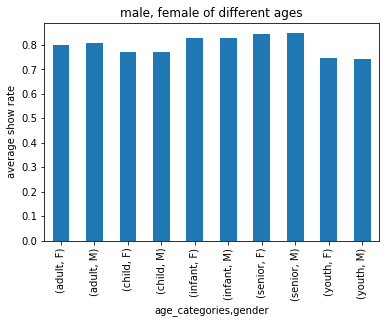

In [19]:
#grouping data based on age categories and gender.
df.groupby(['age_categories','gender']).show.mean().plot(kind='bar')
plt.ylabel('average show rate');
plt.title('male, female of different ages');

the same results appear again here with seniors and infants with the highest show rate, also it's clear that gender doesn't affect show rate.

### is there a day of the week patients will be more likely to show up at?

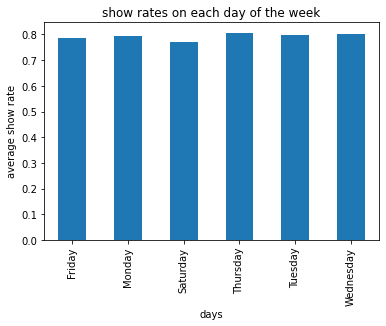

In [27]:
#grouping data by days.
df.groupby('days').show.mean().plot(kind='bar')
plt.ylabel('average show rate');
plt.title('show rates on each day of the week');

there's no correlation between the weekday and show rate of patients, which mean there will be no evidence for the patients to show up or not based on day of the week.

### relating to the question discussed above, we can show the relation between age categories and days of the week.

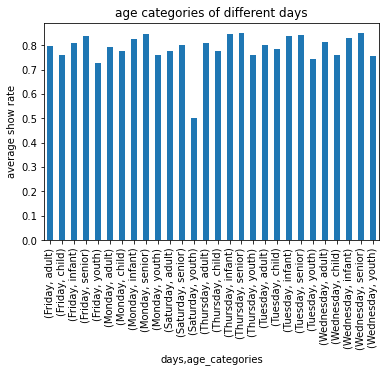

In [30]:
#grouping data based on age categories and days.
df.groupby(['days','age_categories']).show.mean().plot(kind='bar')
plt.ylabel('average show rate')
plt.title('age categories of different days');

one thing to notice about this plotting is that in Saturdays no children or infants show up at all, also youth has very low show up rate relative to both adults and seniors.

### does having a medical condition(eg: Hipertension) increase the chances of showing up?

In [12]:
#basic information about patients' with 
#hipertension in the dataset.
df.hipertension.describe()

count    110526.000000
mean          0.197248
std           0.397923
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hipertension, dtype: float64

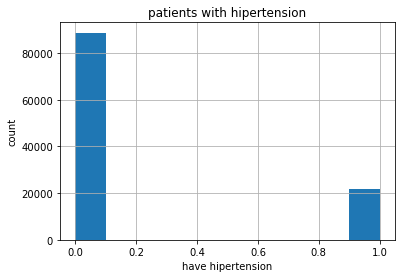

In [11]:
#creating a function to reduce repetitive code.
def plot_hist(column,xlabel,ylabel,title):
    column.hist();
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
plot_hist(df.hipertension,'have hipertension', 'count', 'patients with hipertension')

It's clear that most patients don't suffer from hipertension.

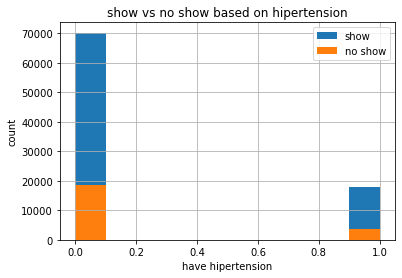

In [17]:
df.hipertension[show].hist(label='show')
df.hipertension[no_show].hist(label='no show')
plt.xlabel('have hipertension')
plt.ylabel('count')
plt.title('show vs no show based on hipertension')
plt.legend();

In [18]:
#percentage of show and no show in the dataset
#based on hipertension.
(df.hipertension[show].value_counts()/df.hipertension.value_counts()).round(2)
(df.hipertension[no_show].value_counts()/df.hipertension.value_counts()).round(2)

0    0.21
1    0.17
Name: hipertension, dtype: float64

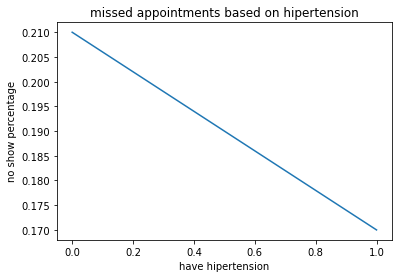

In [19]:
(df.hipertension[no_show].value_counts()/df.hipertension.value_counts()).round(2).plot();
plt.xlabel('have hipertension');
plt.ylabel('no show percentage');
plt.title('missed appointments based on hipertension');

Based on the dataset and the plotting above, it's clear that people suffering from hipertension are actually less likely to miss their appointments.

In [21]:
#basic information about patients' with 
#alcoholism in the dataset.
df.alcoholism.describe()

count    110526.000000
mean          0.030400
std           0.171686
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: alcoholism, dtype: float64

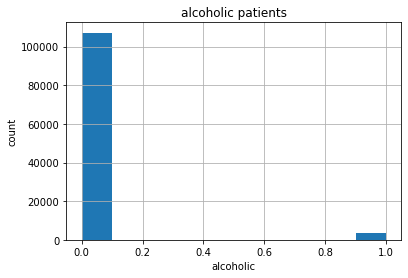

In [12]:
plot_hist(df.alcoholism,'alcoholic', 'count', 'alcoholic patients')

clearly most patients are not alcoholic.

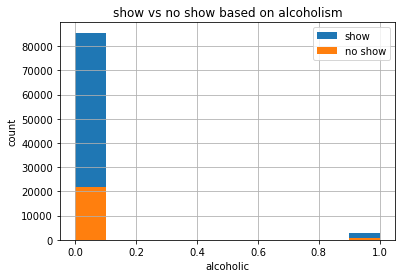

In [23]:
df.alcoholism[show].hist(label='show')
df.alcoholism[no_show].hist(label='no show')
plt.xlabel('alcoholic')
plt.ylabel('count')
plt.title('show vs no show based on alcoholism')
plt.legend();

In [24]:
#percentage of show and no show in the dataset
#based on alcoholism.
(df.alcoholism[show].value_counts()/df.alcoholism.value_counts()).round(2)
(df.alcoholism[no_show].value_counts()/df.alcoholism.value_counts()).round(2)

0    0.2
1    0.2
Name: alcoholism, dtype: float64

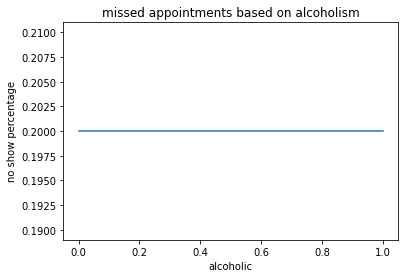

In [26]:
(df.alcoholism[no_show].value_counts()/df.alcoholism.value_counts()).round(2).plot();
plt.xlabel('alcoholic');
plt.ylabel('no show percentage');
plt.title('missed appointments based on alcoholism');

the figure shows that being alcoholic doesn't affect show rate for medical appointments.

In [27]:
#basic information about patients' with 
#diabetes in the dataset.
df.diabetes.describe()

count    110526.000000
mean          0.071865
std           0.258266
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64

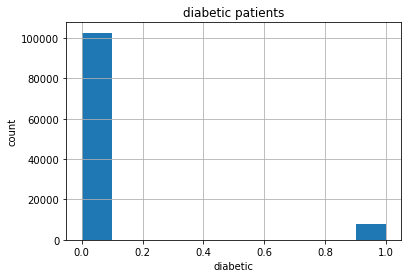

In [13]:
plot_hist(df.diabetes,'diabetic', 'count', 'diabetic patients')

the majority of the patients on the dataset don't suffer from diabetes.

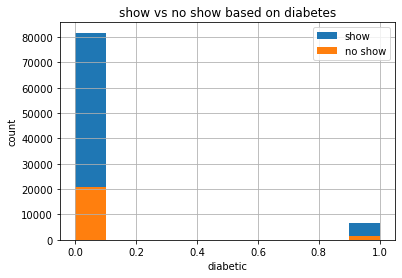

In [29]:
df.diabetes[show].hist(label='show')
df.diabetes[no_show].hist(label='no show')
plt.xlabel('diabetic')
plt.ylabel('count')
plt.title('show vs no show based on diabetes')
plt.legend();

In [31]:
#percentage of show and no show in the dataset
#based on alcoholism.
(df.diabetes[show].value_counts()/df.diabetes.value_counts()).round(2)
(df.diabetes[no_show].value_counts()/df.diabetes.value_counts()).round(2)

0    0.20
1    0.18
Name: diabetes, dtype: float64

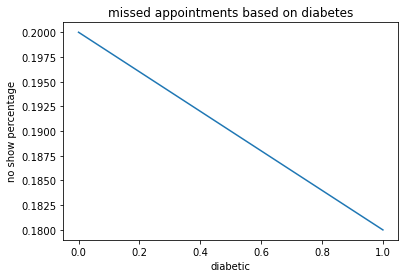

In [32]:
(df.diabetes[no_show].value_counts()/df.diabetes.value_counts()).round(2).plot();
plt.xlabel('diabetic');
plt.ylabel('no show percentage');
plt.title('missed appointments based on diabetes');

From the figure above, the data shows that being diabetic increase the chances of showing up for medical appointments.

In [33]:
#basic information about patients' with 
#handcap in the dataset.
df.handcap.describe()

count    110526.000000
mean          0.022248
std           0.161543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: handcap, dtype: float64

In [35]:
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

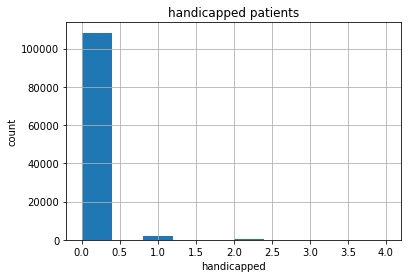

In [14]:
plot_hist(df.handcap,'handicapped', 'count', 'handicapped patients')

The majority of the patients in the dataset are not handicapped.

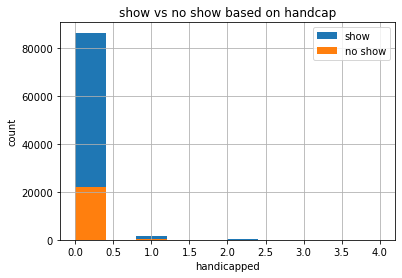

In [36]:
df.handcap[show].hist(label='show')
df.handcap[no_show].hist(label='no show')
plt.xlabel('handicapped')
plt.ylabel('count')
plt.title('show vs no show based on handcap')
plt.legend();

In [38]:
#percentage of show and no show in the dataset
#based on alcoholism.
(df.handcap[show].value_counts()/df.handcap.value_counts()).round(2)
(df.handcap[no_show].value_counts()/df.handcap.value_counts()).round(2)

0    0.20
1    0.18
2    0.20
3    0.23
4    0.33
Name: handcap, dtype: float64

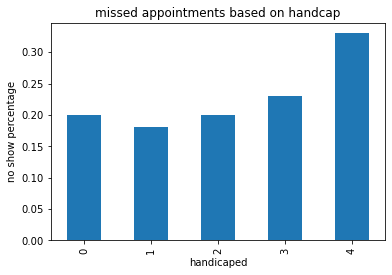

In [40]:
(df.handcap[no_show].value_counts()/df.handcap.value_counts()).round(2).plot(kind='bar');
plt.xlabel('handicaped');
plt.ylabel('no show percentage');
plt.title('missed appointments based on handcap');

the data is mostly left skewed, meaning that patients with more disabilities  are more likely to miss their medical appointments.

<a id='conclusions'></a>
## conclusions

During this analysis, we found that age affect show rate in patients, with seniors are less likely to miss their medical appointments followed by infants, also we found that gender have no effect on show rate, as both men and women have exactly the same percentage of missing their medical appointments. Weekdays had no dirct effect on show rates of patients, but Saturday in particual had no infants or children patiens(ages range from 0 to 14). Having medical condition does affect show rates of patients in cases like hipertension, diabetes, and handicapped, but doesn't in a case like alcoholism.
#### limitions:
It's worth mentioning, that after droping and adding columns, cleaning data, there was some duplicate values in the dataset that didn't appear at first, also the conclusions drawn on the handicapped patients could have some erroness in it, as there were no enough data for patients with more than one handicap.